### Goal is to look into the large scale tokenization of the entire dataset


#### Takeaways: We CAN TF-IDF 2 million, but memory is a big issue? That on top of not playing around with embeddings yet is a slightly sussy thought.

In [1]:
import pandas as pd
import numpy as np
import pickle
from transformers import AutoTokenizer, AutoModel
from datasets import Dataset
from datasets import load_dataset
import datasets
import torch
from collections import Counter
import string
from scipy import spatial
import nltk
from nltk.stem import RegexpStemmer

from nltk.corpus import stopwords

c:\Users\halom\anaconda3\envs\test2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_dict = datasets.load_from_disk("./Dataset/CodeSearchCorpus/")
train_dataset = dataset_dict["train"]

In [3]:
# train_dataset.to_pandas() Not feasible, 90% memory

In [4]:
# train_dataset

In [5]:
num_rows = 100000
np.random.seed(1)
train_subset_indices = np.random.choice(len(train_dataset), num_rows, replace = False)
train_dataset_subset = train_dataset.select(train_subset_indices)
len(train_dataset_subset)


100000

In [6]:
train_dataset_subset

Dataset({
    features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
    num_rows: 100000
})

In [8]:
train_dataset_subset = train_dataset_subset.select_columns("func_documentation_string")

In [9]:
# train_dataset_subset = train_dataset_subset.select_columns("func_documentation_string")

In [10]:
# train_dataset_subset.to_pandas()

In [11]:
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

st = RegexpStemmer('ing$|s$|e$|able$', min=4)
tokenizer = RegexpTokenizer(r'\w+')
# tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

In [12]:
train_dataset_subset = train_dataset_subset.to_pandas()

In [13]:
# nltk.download('stopwords')

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
train_dataset_subset["func_doc_tokens"] = train_dataset_subset["func_documentation_string"].apply(lambda x: tokenizer.tokenize(x))

train_dataset_subset["func_doc_stem_tokens"] = train_dataset_subset["func_doc_tokens"].apply(lambda x: [st.stem(word.lower()) for word in x if word not in stop_words])
# train_dataset_subset["func_doc_stem_tokens"] = train_dataset_subset["func_doc_tokens"].apply(lambda x: [st.stem(word) for word in x if word not in stop_words])
# ~35 seconds

In [16]:
train_dataset_subset["func_doc_stem_tokens"][0]

['load',
 'yaml',
 'configuration',
 'param',
 'path',
 'pathlib',
 'path',
 'object',
 'point',
 'configuration']

In [17]:
# [st.stem(word) for word in train_dataset_subset["func_doc_tokens"][0] if word not in stop_words]

In [18]:
# [st.stem(word) for word in train_dataset_subset["func_doc_tokens"][0]]

In [19]:
train_dataset_subset["func_doc_stem_tokens"]

0        [load, yaml, configuration, param, path, pathl...
1        [convert, ast, dot, representation, append, gi...
2        [get, summary, trac, lin, messag, javadoc, des...
3        [candeletedirectory, return, nil, todo, check,...
4        [compute, pseudo, invers, not, function, use, ...
                               ...                        
99995    [load, object, json, fil, saved, py, func, con...
99996    [logrequest, create, request, logger, goa, mid...
99997    [construct, new, acces, control, policy, condi...
99998    [return, dict, contain, subset, namespac, pref...
99999    [restaddvirtualhost, parse, payload, add, vhos...
Name: func_doc_stem_tokens, Length: 100000, dtype: object

In [20]:
from nltk.util import ngrams

In [21]:
train_dataset_subset["func_doc_stem_tokens"][0]
list(ngrams(train_dataset_subset["func_doc_stem_tokens"][0], 2))

[('load', 'yaml'),
 ('yaml', 'configuration'),
 ('configuration', 'param'),
 ('param', 'path'),
 ('path', 'pathlib'),
 ('pathlib', 'path'),
 ('path', 'object'),
 ('object', 'point'),
 ('point', 'configuration')]

In [22]:
bigram_lst = []
for i in range(100000):
    bigram_lst += list(ngrams(train_dataset_subset.iloc[i]["func_doc_stem_tokens"], 2))

In [23]:
bigram_counter = Counter(bigram_lst)


In [24]:
len(bigram_counter)
test = bigram_counter.values()

In [25]:
import statistics

In [26]:
list(test)

[12,
 9,
 206,
 271,
 2,
 6,
 29,
 11,
 1,
 1,
 1,
 5,
 2,
 18,
 22,
 101,
 64,
 1,
 1,
 1,
 1,
 2,
 91,
 1449,
 1,
 1,
 4,
 1,
 39,
 29,
 1,
 3,
 1,
 1,
 4,
 3,
 5,
 4,
 6,
 14,
 14,
 3,
 3,
 1,
 120,
 1,
 13,
 19,
 2,
 2,
 2,
 36,
 74,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 3,
 2,
 2,
 70,
 2,
 2,
 41,
 28,
 12,
 181,
 8,
 12,
 863,
 4,
 1,
 1,
 16,
 53,
 41,
 257,
 204,
 1706,
 424,
 531,
 24,
 18,
 110,
 13,
 13,
 40,
 93,
 93,
 93,
 93,
 93,
 96,
 93,
 90,
 810,
 447,
 433,
 431,
 430,
 328,
 565,
 93,
 95,
 3,
 1,
 1,
 2,
 4,
 4,
 2890,
 110,
 32,
 21,
 37,
 73,
 1,
 2,
 79,
 15395,
 1,
 1,
 4,
 2,
 2,
 1,
 4,
 1,
 2,
 8,
 1,
 3,
 1,
 22,
 4594,
 24,
 6,
 13,
 1,
 2,
 440,
 35,
 1,
 2,
 205,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 9,
 1,
 129,
 95,
 5,
 3,
 1,
 88,
 89,
 20,
 1,
 1,
 11,
 7,
 2,
 3,
 3,
 7,
 1,
 2,
 3,
 58,
 1,
 1,
 2,
 8,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 2,
 1,
 1,
 1684,
 1,
 1,
 1846,
 159,
 51,
 12,
 2,
 2,
 2,
 1,
 3,
 10,
 221,
 10,
 1,
 1,
 

In [27]:
# bigram_counter = (Counter({k: c for k, c in bigram_counter.items() if c <= 1000 and c >= 50}))
# bigram_counter = bigram_counter
# len(bigram_counter)
# bigram_counter[('valu', 'param')]
bigram_counter
len(bigram_counter)
bigram_set = set(list(bigram_counter.keys()))


In [28]:
bigram_set

{('annotation', 'only'),
 ('verbos', 'hub'),
 ('conf', 'salt'),
 ('will', 'build'),
 ('jsptagref', 'databind'),
 ('tak', 'significant'),
 ('str', 'jobstor'),
 ('unknown', 'id'),
 ('locator', 'point'),
 ('link', 'include'),
 ('_', 'relativ'),
 ('fram', 'found'),
 ('valid', 'determine'),
 ('specified', 'sav'),
 ('function', 'count'),
 ('group', 'association'),
 ('shipment', 'item'),
 ('cpu', 'out_base_local'),
 ('action', 'associat'),
 ('request', 'retriev'),
 ('function', 'client'),
 ('request', 'authorization'),
 ('net_ldap2_error', 'tru'),
 ('contribution', 'gen'),
 ('phas', '180'),
 ('memory', 'array'),
 ('creat', 'vtk'),
 ('text', 'next'),
 ('file_mapping_conf', 'param'),
 ('optimally', 'scal'),
 ('installed', 'throw'),
 ('explicitly', 'part'),
 ('script', 'input'),
 ('из', 'полного'),
 ('p', 'finishe'),
 ('0', '指定二维码有效时间60'),
 ('protocal', '协议'),
 ('rr_nam', 'the'),
 ('draw', 'if'),
 ('return', 'serviceproviderinterfac'),
 ('http', 'icalendar'),
 ('contribution', 'remain'),
 ('stat

In [29]:
len(bigram_set), ('load', 'yaml') in bigram_set

(829487, True)

In [35]:
inverted_index = {}
totallen_sum = 0
for i in range(len(train_dataset_subset)):
    token_counter = Counter(train_dataset_subset.iloc[i]["func_doc_stem_tokens"])
    bigram_counter_i = Counter(list(ngrams(train_dataset_subset.iloc[i]["func_doc_stem_tokens"], 2)))
    total_len = sum(token_counter.values()) + sum(bigram_counter_i.values())
    totallen_sum += (total_len)
    for token in token_counter:
        if token not in inverted_index:
            inverted_index[token] = {}
        inverted_index[token][i] = (token_counter[token], total_len)
    
    for bigram in bigram_counter_i:
        if bigram in bigram_set:
            if bigram not in inverted_index:
                inverted_index[bigram] = {}
            inverted_index[bigram][i] = (bigram_counter_i[bigram],total_len)

In [40]:
bm_avg_Dl = totallen_sum / len(train_dataset_subset)
bm_b = 0.75
bm_k = 1.2


In [31]:
inverted_index["yaml"]
# inverted_index["load"]

{0: (1, 19),
 44: (1, 25),
 1212: (1, 75),
 1374: (1, 19),
 1929: (7, 247),
 2100: (3, 303),
 2319: (1, 135),
 2557: (1, 83),
 3190: (1, 47),
 3202: (1, 13),
 3907: (1, 103),
 7070: (1, 23),
 7993: (2, 85),
 8533: (3, 33),
 8774: (1, 5),
 9183: (1, 193),
 10113: (2, 129),
 10315: (1, 35),
 11139: (1, 21),
 12164: (1, 49),
 12280: (1, 9),
 12972: (1, 37),
 13108: (1, 21),
 13919: (1, 15),
 14031: (1, 33),
 14296: (1, 15),
 14314: (1, 17),
 15135: (2, 211),
 15304: (1, 37),
 15618: (1, 145),
 16318: (1, 229),
 16853: (2, 93),
 17075: (3, 175),
 17432: (1, 119),
 17451: (1, 5),
 17682: (1, 11),
 18073: (1, 213),
 18503: (1, 11),
 19180: (3, 155),
 20987: (13, 121),
 23392: (1, 381),
 23706: (3, 37),
 24885: (2, 299),
 24949: (1, 101),
 24989: (1, 17),
 26596: (1, 91),
 26718: (3, 97),
 27098: (2, 21),
 27494: (1, 125),
 29347: (2, 29),
 29581: (1, 47),
 29645: (2, 61),
 30317: (1, 47),
 30448: (2, 47),
 30786: (1, 21),
 31020: (1, 115),
 31313: (1, 61),
 31357: (1, 35),
 31839: (3, 293),


In [32]:
# inverted_index
# for bigram in bigram_counter:
#     print(bigram)

# inverted_index[('to', 'draw')]

# tf_idf = {}
# for i in range(len(train_dataset_subset)):
#     # print(i)
#     tokens = train_dataset_subset["func_doc_stem_tokens"].iloc[i]
    
#     bigram_lst_i = []
#     for bigram in list(ngrams(train_dataset_subset.iloc[i]["func_doc_stem_tokens"], 2)):
#         if bigram in bigram_set:
#             bigram_lst_i.append(bigram)
#     tokens += bigram_lst_i
#     # print(tokens)
#     counter = Counter(tokens)
#     words_count = len(tokens)

#     for token in set(tokens):
#         tf = counter[token] / words_count
#         df = len(inverted_index[token])
#         idf = np.log((len(train_dataset_subset) + 1) / (df + 1))

#         tf_idf[i, token] = tf * idf


In [41]:
bm_avg_Dl ,bm_b ,bm_k 

(41.74983, 0.75, 1.2)

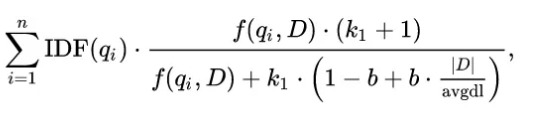

In [42]:
def query_results_BM25(query_string, inverted_index, k = 10):
    query_tokens = [st.stem(word) for word in tokenizer.tokenize(query_string) if word not in stop_words]
    # print(query_tokens)
    rel_indices = []
    
    answer_dict = {} 
    for token in query_tokens:
        if token in inverted_index:
            rel_indices = list(set(inverted_index[token].keys()))

            for rel_i in rel_indices:
                if rel_i not in answer_dict:
                    answer_dict[rel_i] = 0
                # print(inverted_index[token], token)
                tf = inverted_index[token][rel_i][0] / inverted_index[token][rel_i][1]
                df = len(inverted_index[token])
                idf = np.log((len(train_dataset_subset) + 1) / (df + 1))
                bm_comp = (tf * (bm_k + 1)) / (tf + bm_k * (1 - bm_b + bm_b * (inverted_index[token][rel_i][1] / bm_avg_Dl)))
                answer_dict[rel_i] += bm_comp * idf #FIX THIS LINE RIGHT HERE FOR BM_25

    
    bigram_lst = list(ngrams(query_tokens, 2))
    for bigram in bigram_lst:
        if bigram in inverted_index:
            rel_indices = list(set(inverted_index[bigram].keys()))

            for rel_i in rel_indices:
                if rel_i not in answer_dict:
                    answer_dict[rel_i] = 0
                
                tf = inverted_index[bigram][rel_i][0] / inverted_index[bigram][rel_i][1]
                df = len(inverted_index[bigram])
                idf = np.log((len(train_dataset_subset) + 1) / (df + 1))
                bm_comp = (tf * (bm_k + 1)) / (tf + bm_k * (1 - bm_b + bm_b * (inverted_index[bigram][rel_i][1] / bm_avg_Dl)))

                answer_dict[rel_i] += 2 * bm_comp * idf
                
                    # print(bigram, rel_i)

    # len(query_embedding[0])
    # len(tsed_DF["embeddings"][0])
    
    # print(query_tokens)
    # print(len(rel_indices))

    # print(answer_dict)
    result_lst = [(a,b) for (a,b) in answer_dict.items()]
    result_lst.sort(reverse=True, key = lambda x: x[1])
    return result_lst[:k]

    

In [33]:
def query_results_NEW(query_string, inverted_index, k = 10):
    query_tokens = [st.stem(word) for word in tokenizer.tokenize(query_string) if word not in stop_words]
    # print(query_tokens)
    rel_indices = []
    
    answer_dict = {} 
    for token in query_tokens:
        if token in inverted_index:
            rel_indices = list(set(inverted_index[token].keys()))

            for rel_i in rel_indices:
                if rel_i not in answer_dict:
                    answer_dict[rel_i] = 0
                # print(inverted_index[token], token)
                tf = inverted_index[token][rel_i][0] / inverted_index[token][rel_i][1]
                df = len(inverted_index[token])
                idf = np.log((len(train_dataset_subset) + 1) / (df + 1))
                answer_dict[rel_i] += tf * idf

    
    bigram_lst = list(ngrams(query_tokens, 2))
    for bigram in bigram_lst:
        if bigram in inverted_index:
            rel_indices = list(set(inverted_index[bigram].keys()))

            for rel_i in rel_indices:
                if rel_i not in answer_dict:
                    answer_dict[rel_i] = 0
                
                    tf = inverted_index[bigram][rel_i][0] / inverted_index[bigram][rel_i][1]
                    df = len(inverted_index[bigram])
                    idf = np.log((len(train_dataset_subset) + 1) / (df + 1))
                    answer_dict[rel_i] += 2 * tf * idf
                
                    # print(bigram, rel_i)

    # len(query_embedding[0])
    # len(tsed_DF["embeddings"][0])
    
    # print(query_tokens)
    # print(len(rel_indices))

    # print(answer_dict)
    result_lst = [(a,b) for (a,b) in answer_dict.items()]
    result_lst.sort(reverse=True, key = lambda x: x[1])
    return result_lst[:k]

    

In [1]:
# def query_results(query_string, inverted_index, tf_idf, k = 10):
#     query_tokens = [st.stem(word) for word in tokenizer.tokenize(query_string) if word not in stop_words]
#     # print(query_tokens)
#     rel_indices = []
    
#     # answer_dict = 
#     for token in query_tokens:
#         if token in inverted_index:
#             rel_indices = list(inverted_index[token].keys())
    
#     bigram_lst = list(ngrams(query_tokens, 2))
#     for bigram in bigram_lst:
#         if bigram in inverted_index:
#             # print(bigram)
#             # print(list(inverted_index[bigram].keys()))
#             query_tokens.append(bigram)
#             rel_indices += list(inverted_index[bigram].keys())
    
#     rel_indices = set(rel_indices)

#     # len(query_embedding[0])
#     # len(tsed_DF["embeddings"][0])
    
#     print(query_tokens)
#     print(len(rel_indices))
#     result_lst = []
#     for i in rel_indices:
#         tf_score = 0
#         for token in query_tokens:
#             if (i, token) in tf_idf:
#                 if type(token) != str:
#                     print("HELPPPP", i, tf_idf[(i, token)])
#                     tf_score += 2 * (tf_idf[(i, token)])
#                 else:
#                     # print("No")
#                     tf_score += (tf_idf[(i, token)])
#             # try:
#             #     # print(tf_idf[(i, token)])
#             #     tf_score += (tf_idf[(i, token)])
#             # except: 
#             #     # print(token)
#             #     continue #this is bad, make sure this isn't the play
#         # print(i)

        

#         result_lst.append([i, tf_score])
    
#     result_lst.sort(reverse=True, key = lambda x: x[1])
#     return result_lst[:k]

In [43]:
# tf_idf[3760]

query_results_BM25("string to datetime", inverted_index, k = 10)

[(44109, 4.0694796355676255),
 (9496, 4.023316407037782),
 (39418, 3.8369904848044296),
 (11453, 3.8369904848044296),
 (78344, 3.705331870176707),
 (54648, 3.518929120021014),
 (3760, 3.4703447516590016),
 (6375, 2.9754506111296317),
 (8798, 2.9754506111296317),
 (87076, 2.9754506111296317)]

In [44]:
query_results_NEW("string to datetime", inverted_index, k = 10)

# [[39418, 2.4423054773840445],
#  [11453, 2.4423054773840445],
#  [44109, 2.0352545644867033],
#  [98562, 1.7445039124171742],
#  [55271, 1.7445039124171742],
#  [8798, 1.5264409233650276],
#  [87076, 1.5264409233650276],
#  [19040, 1.4366502808141435],
#  [94558, 1.4366502808141435],
#  [86413, 1.4090223907984871]]

[(39608, 1.5860732410676501),
 (78344, 1.4990110008251887),
 (54648, 1.2972210584064134),
 (39418, 1.2491758340209904),
 (11453, 1.2491758340209904),
 (44109, 1.1242582506188916),
 (65978, 1.0707221434465632),
 (88011, 1.0573821607117666),
 (45214, 1.04657557623676),
 (86413, 1.0262924597805252)]

In [49]:
train_dataset_subset.iloc[78344]["func_documentation_string"]

'Get datetime from Entity\n@param DateTime $dateTime\n@return DateTime'

In [ ]:
inverted_index[('str', 'datetim')]

In [ ]:
train_dataset_subset.iloc[3760]["func_documentation_string"]

In [ ]:
"save list to file"
query_results("save list to file", inverted_index, tf_idf, k = 10)

In [ ]:
train_dataset_subset.iloc[97660]["func_documentation_string"]

In [ ]:
# tf_idf
# len(inverted_index)#144089

In [ ]:
# 144089 - 138465

In [ ]:
# tf_idf

In [ ]:
# train_dataset = train_dataset.select_columns("func_documentation_string")

# train_dataset

In [ ]:
# train_dataset = train_dataset.map(lambda tkn: {"func_doc_tokens": tokenizer.tokenize(tkn)})

In [ ]:
# train_dataset_DF = train_dataset.to_pandas()

In [ ]:
# tokenizer.tokenize(test_sentence)

In [ ]:
train_dataset_DF["func_doc_tokens"] = train_dataset_DF["func_documentation_string"].apply(lambda x: tokenizer.tokenize(x))

#25.3 seconds

In [ ]:
train_dataset_DF["func_doc_stem_tokens"] = train_dataset_DF["func_doc_tokens"].apply(lambda x: [st.stem(word) for word in x])
# ~35 seconds

In [ ]:
# test_tokens
# [ps.stem(word) for word in test_tokens]

In [ ]:
inverted_index = {}
for i in range(len(train_dataset_DF)):
    token_counter = Counter(train_dataset_DF.iloc[i]["func_doc_stem_tokens"])

    for token in token_counter:
        if token not in inverted_index:
            inverted_index[token] = {}
        inverted_index[token][i] = token_counter[token]

#Took ~2 minutes

In [ ]:
# len(inverted_index)

In [ ]:
#73622 No stemming
#68995 with stemming
#Pickle afterwards
# with open("./pickleObjects/inverted_index_FULL.pkl", 'wb') as f:  # open a text file
#     pickle.dump(inverted_index, f) # serialize the list
#     f.close()

In [ ]:
# with open("./pickleObjects/tfidf_FULL.pkl", 'wb') as f:  # open a text file
#     pickle.dump(tf_idf, f) # serialize the list
#     f.close()

In [ ]:
with open('./pickleObjects/inverted_index_FULL.pkl', 'rb') as f:
    inverted_index = pickle.load(f) # deserialize using load()
    f.close()

In [ ]:
tf_idf = {}
for i in range(len(train_dataset_DF)):
    # print(i)
    tokens = train_dataset_DF["func_doc_stem_tokens"].iloc[i]
    counter = Counter(tokens)
    words_count = len(tokens)

    for token in np.unique(tokens):
        tf = counter[token] / words_count
        df = len(inverted_index[token])
        idf = np.log((len(train_dataset_DF) + 1) / (df + 1))

        tf_idf[i, token] = tf * idf

# 4 minutes there or thereabouts

In [ ]:
# with open("./pickleObjects/tfidf_FULL.pkl", 'wb') as f:  # open a text file
#     pickle.dump(tf_idf, f) # serialize the list
#     f.close()

In [ ]:
# with open('./pickleObjects/tfidf_FULL.pkl', 'rb') as f:
#     tf_idf = pickle.load(f) # deserialize using load()
#     f.close()

In [ ]:
def query_results(query_string, inverted_index, tf_idf, k = 10):
    query_tokens = [st.stem(word) for word in tokenizer.tokenize(query_string)]
    print(query_tokens)
    rel_indices = []
    
    for token in query_tokens:
        if token in inverted_index:
            rel_indices += list(inverted_index[token].keys())
    
    rel_indices = set(rel_indices)

    # len(query_embedding[0])
    # len(tsed_DF["embeddings"][0])
    

    result_lst = []
    for i in rel_indices:
        for token in query_tokens:
            tf_score = 0

            # if (i, token) in tf_idf:
            #     tf_score += (tf_idf[(i, token)])
            try:
                # print(tf_idf[(i, token)])
                tf_score += (tf_idf[(i, token)])
            except: 
                continue #this is bad, make sure this isn't the play
        # print(i)

        result_lst.append([i, tf_score])
    
    result_lst.sort(reverse=True, key = lambda x: x[1])
    return result_lst[:k]

In [ ]:
query_results("string to datetime", inverted_index, tf_idf, k = 50)

In [ ]:
train_dataset[100930]

In [ ]:
print((0, 'str') in tf_idf)

In [ ]:
(0, 'Chosen') in tf_idf
# 'Chosen' in tf_idf

In [2]:
def a(x):
    print(x)

def b(x):
    print(x**2)

def c(x):
    print(x ** (1/2))


In [4]:
dict_test = {"a" : a, "b": b, "c":c}

In [7]:
dict_test["a"](2), dict_test["b"](2), dict_test["c"](2)

2
4
1.4142135623730951


(None, None, None)